# Case Study 2:  More Quadratic Residues!

Here's the code I made for making pretty clocks showing addition and multiplication.  Please feel free to replace it with the code you made.

- ``notch(k,m)`` -- gives the coordinates of notch k mod m
- ``clockface(m)`` -- creates a graphic object clock with notches modulo m and number labellings 
- ``segment(k,l,m,col)`` -- creates a graphic object line from notch k to notch l of colour ``col`` 
- ``multiplication(a,m)`` -- creates the full image of multiplication by a modulo m 
- ``addition(a,m)`` -- creates the full image of addition by a modulo m 

In [8]:
def notch(k, m, r):  # call your function notch so we can refer to it later
    x = r*sin(k*2*pi/m)
    y = r*cos(k*2*pi/m)
    return (x,y)
def clockface(m):
    clock = Graphics()
    clock += circle( (0,0), 1, color="green" ) # center, radius, color
    for k in range(m):
        clock += point( notch(k, m, 1), color="purple")
        clock += text( k, notch(k, m, 1.1), color="purple")
    return clock
def segment(k,l,m,col):
    seg = line( [notch(k, m, 1), notch(l, m, 1)], color=col )
    return seg
def multiplication(a,m):
    clock = clockface(m)
    for k in range(m):
        clock += segment(k,a*k,m,"red")
    return clock
def addition(a,m):
    clock = clockface(m)
    for k in range(m):
        clock += segment(k,a+k,m,"red")
    return clock

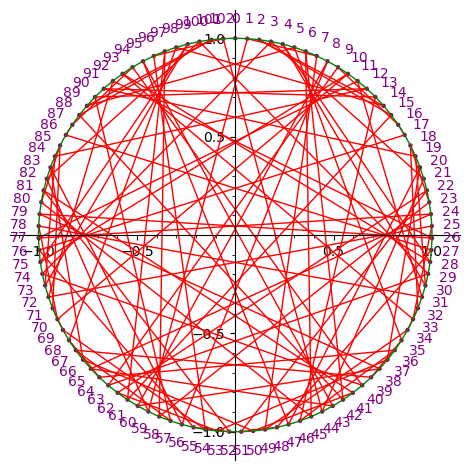

In [9]:
multiplication(7,103).show()

## Matplotlib

My simple functions are easy to read, but Sage's plotting capabilities are fairly minimal.  Fortunately, Sage is built on python, which has libraries for lots of stuff.  In particular, `matplotlib` is a very powerful graphing library for many different tasks.  So we're going to learn the basics of how to use that inside Sage, when we want to make prettier pictures.  A few basic facts:

1. Sage objects are a Sage type, although they are generated using matplotlib under the hood.
2. To make a sage graphics object into a matplotlib object, you can use the command `.matplotlib()`.
3. To use matplotlib python plots directly, you need to load it: `import matplotlib.pyplot as plt`.
4. Sometimes there are type issues, so you may need to cast a Sage real number to a float, for example.

It's hard to go from matplotlib to sage objects, so it's easier, if you want lots of functionality, to just simply work in matplotlib.  Let's convert what we were doing into matplotlib.

### The gist of matplotlib

1. **Fresh canvas**:  Start a new plot with `fig, ax = plt.subplots()` — this creates a figure and one set of axes.

2. **Figure vs. Axes**:  A matplotlib plot lives inside a **figure** (the page/canvas, usually called `fig`), which contains one or more **axes** (the actual plotting regions, usually called `ax`).  You can pass `fig` and `ax` around and add content to them.  You mostly work with `ax`.

3. **Basic drawing**:  Add simple things like points, lines, etc. with `ax.plot(...)`.  This modifies the given axes.

4. **Artists**:  More complex objects (circles, polygons) are called *artists*.  Some have methods that both create and add them (e.g. `ax.text(...)`).  Others need two steps: create the artist (e.g. `circle = plt.Circle(...)`) and then put it on the axes (e.g. `ax.add_patch(circle)`).

5. **Styling and layout**:  At the end, you can adjust aspect ratio, axis visibility, limits, labels, etc. by modifying ax (e.g. `ax.set_aspect("equal")`, `ax.axis("off")`).

As a demonstration and reference, here's the commands at the top of the sheet re-done via matplotlib.  Read these over carefully.

In [10]:
import matplotlib.pyplot as plt

def clockface(m):
    fig, ax = plt.subplots() # fig is the page, ax is the axis system (subplot) you are working on
    circle = plt.Circle((0, 0), radius=1, fill=False, color='red')  # center (0,0), radius 1
    ax.add_patch(circle) # put the circle on the axes (a circle is an "artist" you have to "add")
    for k in range(m):
        loc = notch(k,m,1)
        ax.plot([loc[0]], [loc[1]], "o", color="purple") # the extra [] are because plot can do lines etc.
        loc = notch(k,m,1.1) # text slightly farther out
        ax.text(loc[0], loc[1], k, color="purple", ha='center', va='center') # center alignments
    return fig, ax
def segment(ax,k,l,m,col): # pass in the axes
    start = notch(k, m, 1)
    end = notch(l, m, 1)
    ax.plot([start[0],end[0]], [start[1],end[1]], color=col, linewidth=1)
    return ax # return the modified axes
def multiplication(a,m):
    fig, ax = clockface(m)
    for k in range(m):
        ax = segment(ax,k,a*k,m,"red")
    ax.set_aspect('equal') # aspect ratio 1 so the circle looks round
    ax.axis("off") # no axes or frame
    return fig,ax
def addition(a,m):
    fig, ax = clockface(m)
    for k in range(m):
        ax = segment(ax,k,a+k,m,"red")
    ax.set_aspect('equal')
    ax.axis("off")
    return fig,ax

Try it!

(<Figure size 640x480 with 1 Axes>, <Axes: >)

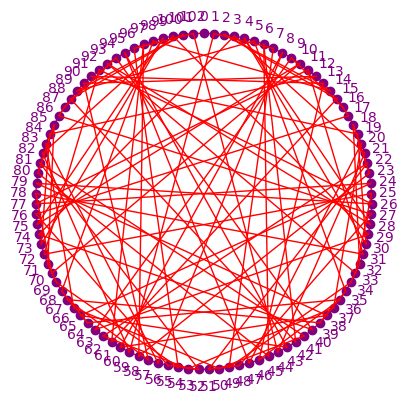

In [11]:
multiplication(7,103)

Now I want to improve these plots, by doing some nice stuff only available in matplotlib.  First upgrade your segment plotting by making the line create a colour gradient along its length.  This helps to differentiate start from end.  Some things you need to know to figure this out:

1. The function `plt.plot()` actually takes two lists:  x coordinates and y coordinates.  So if they are length 1, you get a point, if they are length 2, you get a line, etc.  To make a gradient, you'll actually make a lot of short lines of different colour along the path.
2. If you have imported numpy as np, then it has a handy interpolation function: `np.linspace(start,end,num_points)`.
3. You can make a colour map with something like `colors = plt.matplotlib.colormaps[viridis](np.linspace(0, 1, 100))`
4. More cool colourmaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

I'm intentionally giving you more vague instructions here.  You can look up documentation, or you can ask ChatGPT questions about why something doesn't work or what the right syntax is, etc.

In [36]:
def segment(ax,k,l,m,col,cmap='viridis', detail=20): # rewrite this function
    import numpy as np
    
    start = notch(k, m, 1)
    end = notch(l, m, 1)
    
    # interpolate pts on line
    x = np.linspace(float(start[0]), float(end[0]), detail)
    y = np.linspace(float(start[1]), float(end[1]), detail)

    # make a list of colours varying in a colormap
    colors = plt.matplotlib.colormaps[cmap](np.linspace(0, 1, detail)) # 0 to 1 is range of colourmap

    # draw all the little segments
    for i in range(detail):
        ax.plot(x[i:i+2], y[i:i+2], color=colors[i])

    return ax # return the modified axes

# these don't need to be changed but I decided to allow for colour/detail choices
def multiplication(a,m,cmap='viridis', detail=5):
    fig, ax = clockface(m)
    for k in range(m):
        ax = segment(ax,k,a*k,m,"red",cmap,detail)
    ax.set_aspect('equal') # aspect ratio 1 so the circle looks round
    ax.axis("off") # no axes or frame
    return fig,ax
    
def addition(a,m,cmap='viridis', detail=20):
    fig, ax = clockface(m)
    for k in range(m):
        ax = segment(ax,k,a+k,m,"red",cmap,detail)
    ax.set_aspect('equal')
    ax.axis("off")
    return fig,ax

(<Figure size 640x480 with 1 Axes>, <Axes: >)

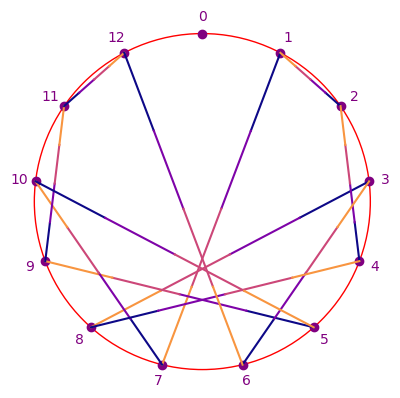

In [127]:
multiplication(7,13,cmap='plasma',detail=5)

Cool!  Looking good.  Now make a version of this that shows only where the first floor((p-1)/2) numbers go to (it plots only half the lines).  Careful with your range bounds.  One option is modify code you had previously to allow for a parameter giving the range of lines to draw.  Or you can cut-n-paste.  In nice code you plan to keep, it's best practice to avoid repetition, so nicer to make a more versatile function and, if you like, create wrappers (quick functions that set certain parameters before calling).  You should always consider feeling abashed when cutting-n-pasting.  But do as you like here.

In [38]:
def half_multiplication(a,m, cmap='viridis', detail=5): # fill in this function
    fig, ax = clockface(m)
    for k in range(ceil(m/2)):
        ax = segment(ax,k,a*k,m,"red",cmap,detail)
    ax.set_aspect('equal') # aspect ratio 1 so the circle looks round
    ax.axis("off") # no axes or frame
    return fig,ax
    
def half_addition(a,m,cmap='viridis', detail=20): # fill in this function
    fig, ax = clockface(m)
    for k in range(ceil(m/2)):
        ax = segment(ax,k,a+k,m,"red",cmap,detail)
    ax.set_aspect('equal')
    ax.axis("off")
    return fig,ax

(<Figure size 640x480 with 1 Axes>, <Axes: >)

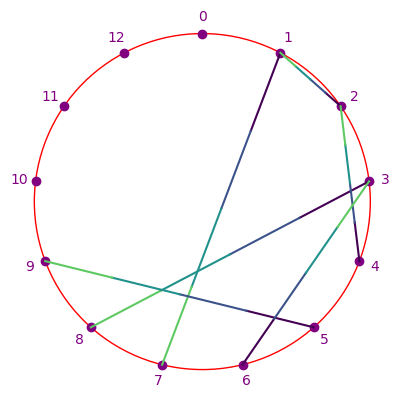

In [182]:
half_multiplication(7,13)

Now write yourself a little loop to display the `half_multiplication` pictures for all residues modulo 23.  You can use `plt.show()` and can label them with print statements.  Print out the legendre symbol -- can you see any patterns?  Hint: you can drag display windows in the notebook to make them larger.  You can also resize pictures with `fig.set_size_inches(3,3)`

2 1


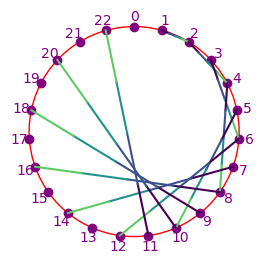

3 1


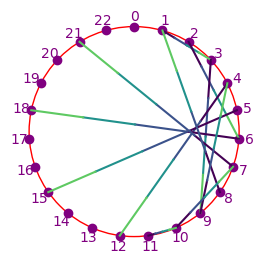

4 1


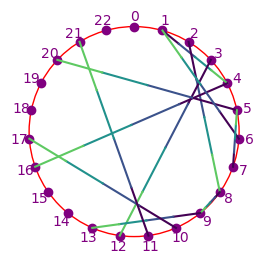

5 -1


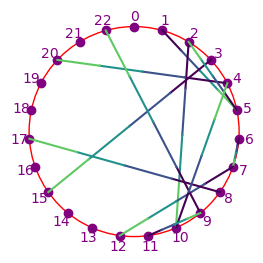

6 1


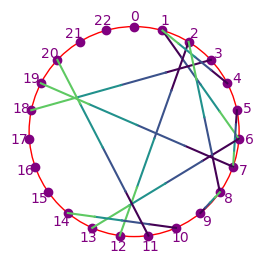

7 -1


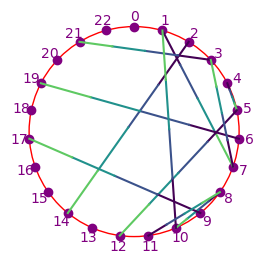

8 1


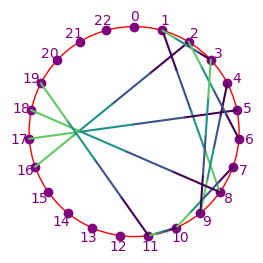

9 1


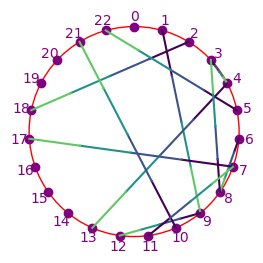

10 -1


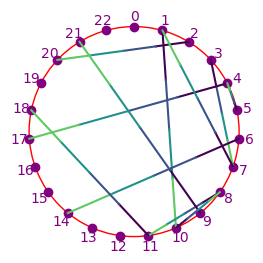

11 -1


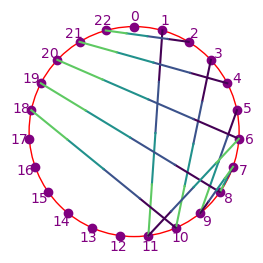

12 1


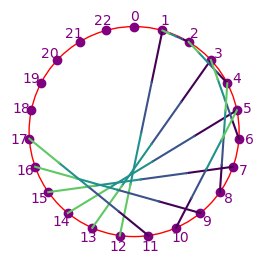

13 1


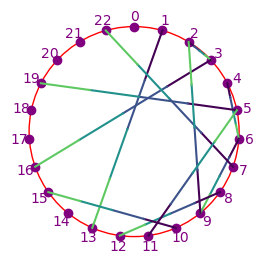

14 -1


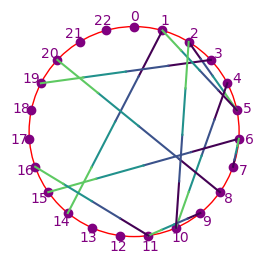

15 -1


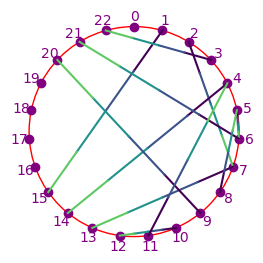

16 1


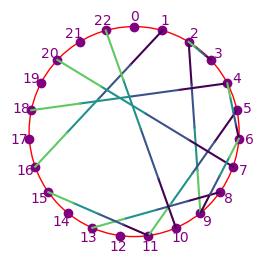

17 -1


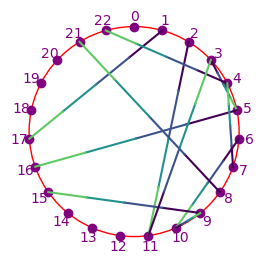

18 1


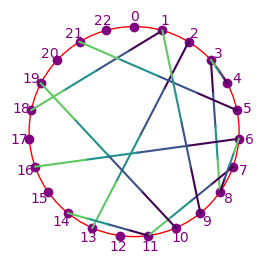

19 -1


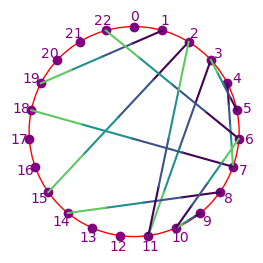

20 -1


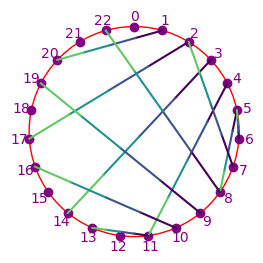

21 -1


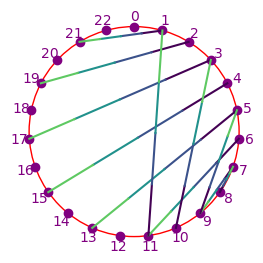

22 -1


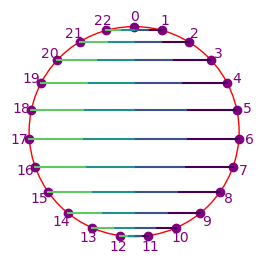

In [183]:
for a in range(2,23):
    fig, ax = half_multiplication(a,23)
    print(a, legendre_symbol(a,23))
    fig.set_size_inches(3,3)
    plt.show()

Ok, I'm looking for a very particular conjecture about these pictures, although you'll probably come up with lots of other interesting patterns!  Ask me for hints or confirmation about your conjecture until you've noticed the pattern I'm after.  Then write this down as a conjecture (just a code comment in the next box) and create some code to test it.  In particular, make a function that tests if your conjecture holds for a given modulus.

In [39]:
# my conjecture is:
def test_modulus(n):
    # fill in

In [32]:
test_modulus(103)

True

Challenge!  Can you do this with a ONE-LINE function??  Use list comprehension.  You can basically do anything in python list comprehension that you can do with set-builder notation.  In particular, you can do "if" statements inside list comprehension: guess what the next box does and then check.

In [15]:
[ x+1 for x in range(10) if is_square(x) ]

[1, 2, 5, 10]

Ok, now test your conjecture -- one line version!

In [33]:
# conjecture:  number of line segments crossing the midline is even when legendre_symbol is 1
def test_modulus_oneliner(m):
    # count the exceptions, if zero return true
    return len([k for k in range(1,m) if ZZ(Mod(len([ a for a in range(ceil((m)/2)) if ZZ(Mod(a*k,m)) > ZZ(ceil((m-1)/2))]),2)) != ZZ((1 - legendre_symbol(k,m))/2)]) == 0

In [34]:
test_modulus_oneliner(103)

True

Fun doing it in one line, perhaps, but hard to debug.  Better to space your code out a bit and have intermediate variables you can print.

Prove your conjecture!

## Now for a different kind of experimentation

Let's forget the diagrams for a bit.  By now you have seen that Legendre symbols are pretty mysterious.  For example, the Generalized Riemann Hypothesis implies that the least (first) quadratic non-residue in $1, 2, \ldots, p-1$ occurs within $(\log p)^2$ elements.  Without GRH, we only know $O(p^n)$, where $n$ is anything bigger than $\sqrt{e}/4$.  which is absurd, right?

Let's take another exploratory tack on these.  Let's first restrict our attention to primes (always a bit safer when first exploring in number theory).  So we care about the Legendre symbol $\left( \frac{p}{q} \right)$ for odd primes $p$ and $q$.  Let's just make a giant table.  In Sage, we can make matrices as `M = matrix([[a,b],[c,d]])`.  Try to make the matrix for a linear transformation that shears, just to make sure you are ok with the syntax.

In [18]:
matrix([[1,5],[0,1]])

[1 5]
[0 1]

Some things about matrices:
1. the input is a list of lists (each list is a row), so you can use list comprehension
2. there's the ability to specify the type of the entries as in `matrix(QQ,[[1,0],[0,1]])` for QQ = rationals; otherwise Sage just guesses.

Now, fill out a big matrix whose (i,j)-th entry is the legendre symbol $\left( \frac{p_i}{p_j} \right)$ where $p_k$ is the $k$-th prime.  The meaning of big is up to you, but something that's actually big, say, more than 50 x 50, but less than 200x200.  You can do this via a nested for loop, but I recommend list comprehension.  By the way, Sage has an `nth_prime` function built in.

In [19]:
N = 100
M = matrix([[legendre_symbol(nth_prime(i),nth_prime(j)) for i in range(2,N)] for j in range(2,N)])

If you try to display your matrix, Sage will tell you unusefully that it's a big matrix.  (Try it: if you called it M, just type M in a cell.)

In [20]:
M

98 x 98 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In fact, there's lots of ways to see what it's in your matrix:

1. `M.str()`
2. `show(M)`
3. `latex(M)`
4. `M[2,3]` for the (2,3) entry
5. `M.row(3)` for the 3rd row.

Try each of those.

In [21]:
M.row(3)

(1, 1, -1, 0, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1)

For future reference, there's also `vector()` and you can multiply matrices and vectors with `*` and do exponentiation with `^` and inverse with `.inverse()` or `^(-1)`.

Any conjectures on the values in this matrix?  Like, patterns?  No?  Ok, check this out:  `M.plot()`.

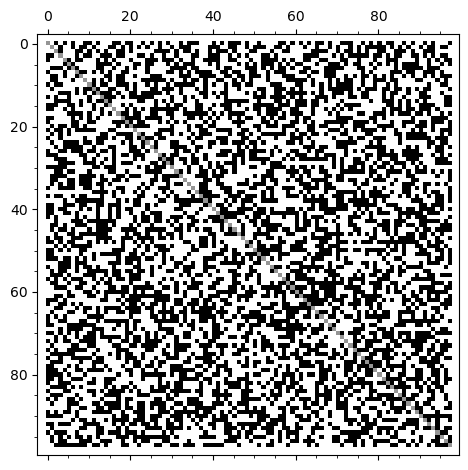

In [22]:
M.plot()

Any conjectures now?  If not, try a new matrix which only deals with primes that are $1 \pmod{4}$.

In [23]:
M2 = matrix([[legendre_symbol(nth_prime(i),nth_prime(j)) for i in range(2,N) if mod(nth_prime(i),4) == 1] for j in range(2,N) if mod(nth_prime(j),4) == 1])

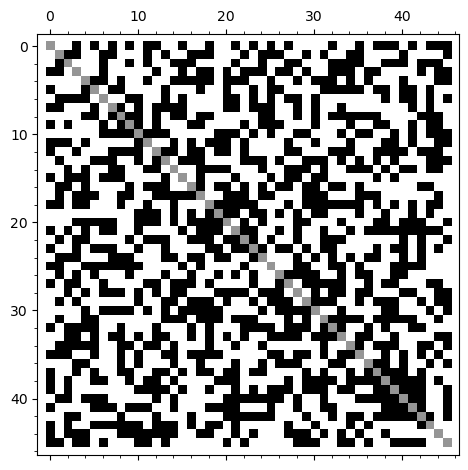

In [24]:
M2.plot()

What's your conjecture now?  Write a function to test it for all primes up to the largest bound you can manage.  How far can you test it?

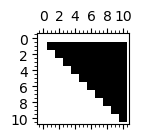

In [25]:
# conjecture = quadratic reciprocity!

# traversing NxN without repeating (a,b) and (b,a)
def pair(n):        # n >= 1
    j = ceil((sqrt(8*n + 1) - 1) / 2)
    i = n - j*(j-1)//2  # same as n - floor(j*(j-1)/2)
    return (i, j)

def prime_pair(n):
    return tuple(nth_prime(x+1) for x in pair(n)) # x+1 so the first entry is the second prime (3)

def reverse_prime_pair(n):
    return tuple(nth_prime(x+1) for x in reversed(pair(n)))

# check this is correct by colouring in a matrix
M = matrix(11, 11) # empty matrix (specifies dimensions)
for n in range(1, 55+1):  # 55 = 10*11/2 entries in upper triangle of 10x10
    i, j = pair(n)
    M[i, j] = 2          
M.plot(figsize=2)

In [26]:
n = 1
while n < 300000:
    primes = prime_pair(n)
    p = primes[0]
    q = primes[1]
    leg = legendre_symbol(*primes)  # the * unpacks the pair
    leg_rev = legendre_symbol(*reversed(primes))
    val = leg * leg_rev * (-1)^( ( (p-1)/2 )*( (q-1)/2 ) )
    if val != 1: 
        if p != q or val != 0:
            print("ERROR!", n, p, q, leg, leg_rev, val)
            break
    if mod(n,10000) == 0:
        print("Checked up to: ", n)
    n += 1

Checked up to:  10000
Checked up to:  20000
Checked up to:  30000
Checked up to:  40000
Checked up to:  50000
Checked up to:  60000
Checked up to:  70000
Checked up to:  80000
Checked up to:  90000
Checked up to:  100000
Checked up to:  110000
Checked up to:  120000
Checked up to:  130000
Checked up to:  140000
Checked up to:  150000
Checked up to:  160000
Checked up to:  170000
Checked up to:  180000
Checked up to:  190000
Checked up to:  200000
Checked up to:  210000
Checked up to:  220000
Checked up to:  230000
Checked up to:  240000
Checked up to:  250000
Checked up to:  260000
Checked up to:  270000
Checked up to:  280000
Checked up to:  290000


Excellent!  You've discovered [Gauss's Lemma](https://en.wikipedia.org/wiki/Gauss%27s_lemma_(number_theory)) and [Quadratic Reciprocity](https://en.wikipedia.org/wiki/Quadratic_reciprocity).

## Unnecessary but fun extra stuff

Some bonus fun for those that have gotten here!

1.  Create a function that will produce the multiplication table of $\mathbb{Z}/n\mathbb{Z}$ in a matrix and use plot() to display it.  It is prettiest if you add colours to your matrix plot (argument `cmap='viridis'` for example).  This is just candy as a reward for all your hard work.

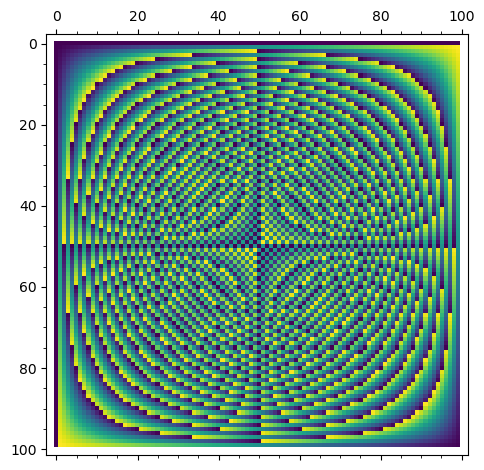

In [27]:
m = 100
matrix_plot(matrix([[mod(x*y,m) for x in range(m)] for y in range(m)]), cmap='viridis')

2. What happens if you fill an $n \times m$ matrix by counting $k = 1,2,\ldots,nm$ and for each $k$, incrementing the entry $( k \mod n, k \mod m)$.  (Guess before you try!)  What famous theorem is this?

3.  You could modify your clock graphs of modular arithmetic to see the function $x \mapsto x^2$.  What do you learn?

4.  How could you enhance or colour the lines of the squaring clock to learn something?  For example, I've seen people colour cycles.